# K-Means Clustering

This notebook demonstrates **K-Means Clustering**, an unsupervised machine learning method that partitions data into groups based on similarity.

In it, we will: 
1. Load the Wine dataset.
2. Apply K-Means clustering to the chemical feature space.
3. Use the **Elbow Method** to choose the number of clusters.
4. Use **Silhouette Analysis** to evaluate cluster quality.
5. Visualize clusters using **Principal Component Analysis (PCA)**.
6. Interpret the discovered clusters in the context of wine chemistry.

K-Means is an unsupervised method, so we do not use the true cultivar labels during training, only for evaluation.

In [7]:
# 1. Imports and Data Loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Wine dataset from sklearn
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
# 2. Standardizing Features
# Standardization improves clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.values)

X_scaled[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

### Why Standardize the Data?

K-Means minimizes Euclidean distances.  
If one feature has a much larger scale (e.g., Proline), it will dominate the distance metric.

Standardization ensures:
- Each feature has mean 0
- Each feature has variance 1

This makes all chemical measurements equally important in clustering.

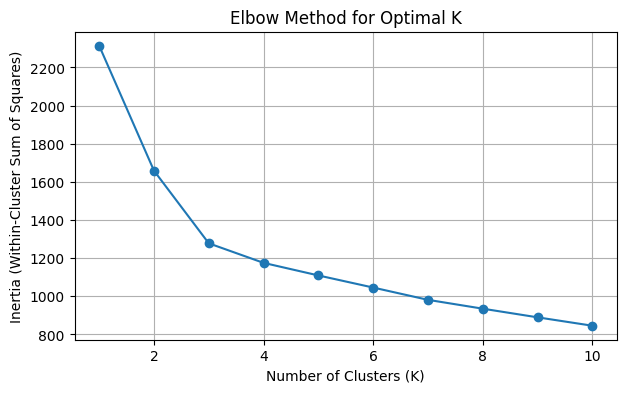

In [9]:
# 3. Elbow Method
inertias = []
K_values = range(1, 11)

for k in K_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K_values, inertias, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

### Interpretation of the Elbow Plot

The "elbow" is the point where additional clusters produce only marginal improvements.

In this plot, the most pronounced drop happens between $K = 1 \rightarrow 3$, after which the curve begins to flatten noticeably. Beyond $K = 3$, improvements become progressively smaller and no longer justify the increased model complexity.

Thus, the elbow suggests that $K \approx 3$ is an appropriate choice for this dataset, balancing cluster separation with model simplicity.

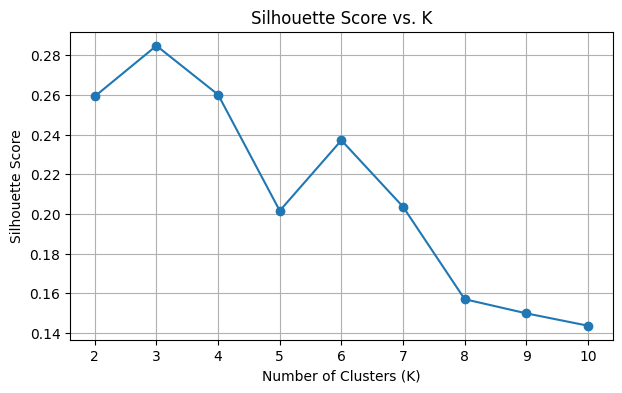

In [10]:
# 4. Silhouette Scores
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(7,4))
plt.plot(K_range, sil_scores, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. K")
plt.grid(True)
plt.show()

### Silhouette Score Interpretation

Silhouette scores peak when clusters are well separated and internally cohesive.

In this plot, the highest score occurs at $K = 3$, indicating the strongest overall cluster structure. Although $K = 2$ and $K = 4$ also produce reasonably good scores, their separation is weaker, and performance declines steadily for larger $K$.

Taken together, the silhouette analysis supports $K = 3$ as the most appropriate choice, aligning with the elbow method and reinforcing the presence of three meaningful cluster groups in the dataset.

In [11]:
# 5. Fit Final K-Means Model
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

df["cluster"] = cluster_labels
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


### Visualizing Clusters with PCA

To visualize 13-dimensional data, we project it onto the first two principal components.

PCA preserves as much variance as possible while enabling 2D plotting.

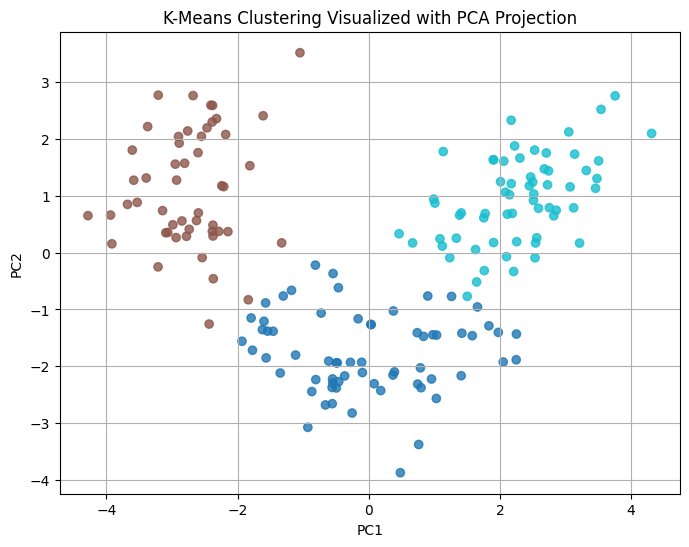

In [12]:
# 6. PCA Projection / Scatter Plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap="tab10", alpha=0.8)
plt.title("K-Means Clustering Visualized with PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

## Interpretation of the Clustering Results

K-Means identifies **three coherent clusters** in the chemical feature space. This is consistent with the selected value of $K=3$. 

One cluster occupies the left side of the plot with distinctly negative PC1 values, while the remaining two clusters are positioned on the right but separated vertically along PC2. This pattern shows that K-Means identifies meaningful structure in the wine chemistry: differences along PC1 correspond to broad chemical variation, while PC2 captures more subtle compositional distinctions. 

The clear separation between clusters in this reduced two-dimensional space indicates that the underlying chemical profiles of the wines form naturally distinct groupings.

## 7. Conclusion

This notebook demonstrated an end-to-end unsupervised analysis using K-Means clustering:

- Loaded the Wine dataset from scikit-learn (reliable & local)
- Standardized chemical features
- Used the Elbow Method and Silhouette Scores to select K
- Applied K-Means clustering
- Visualized clusters using PCA
- Interpreted chemical patterns behind the clusters

The Wine dataset is an excellent example of how unsupervised learning can uncover structure in complex, high-dimensional data — even without labels.
